In [2]:
import pandas as pd
df = pd.read_csv('../data/cleaned_cover_type.csv')

In [3]:
df.head

<bound method NDFrame.head of         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596.0      51    3.0                          5.556828   
1          2590.0      56    2.0                          5.361292   
2          2804.0     139    9.0                          5.594711   
3          2785.0     155   18.0                          5.493061   
4          2595.0      45    2.0                          5.036953   
...           ...     ...    ...                               ...   
145885     2834.0      88    8.0                          5.932245   
145886     2832.0      68    4.0                          5.968708   
145887     2829.0      80    7.0                          5.968708   
145888     2826.0     121    7.0                          5.940171   
145889     2823.0     132   12.0                          5.918894   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             1.790164                

In [6]:
! pip install matplotlib

  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     ------- -------------------------------- 20.5/114.6 kB ? eta -:--:--
     ------------------------ -------------- 71.7/114.6 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 114.6/114.6 kB 957.1 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
    


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


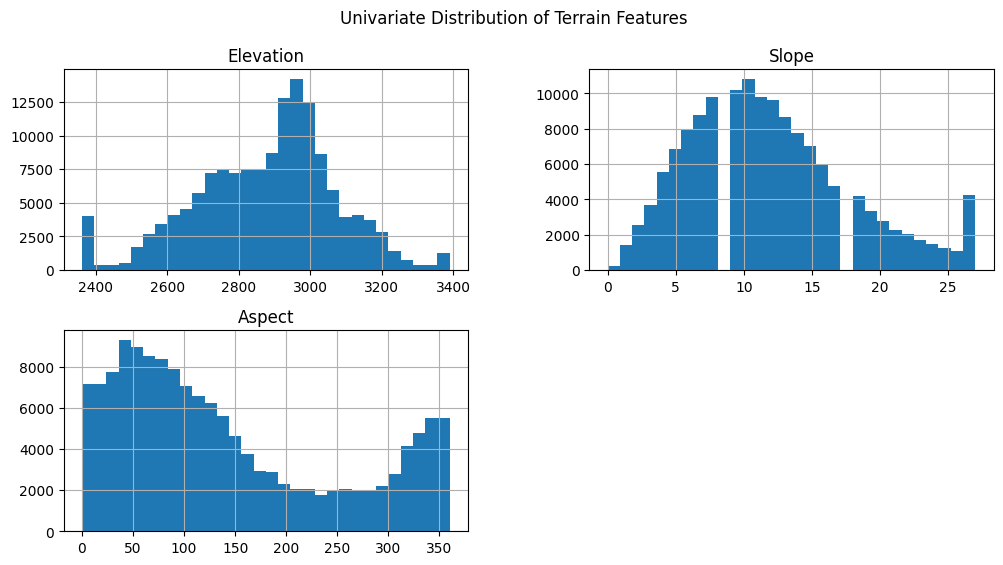

In [7]:
# Histograms show the distribution of values for each feature.
# Helps detect skewness, modality (uni/bimodal), and unusual patterns.
import matplotlib.pyplot as plt
df[['Elevation', 'Slope', 'Aspect']].hist(bins=30, figsize=(12, 6))
plt.suptitle("Univariate Distribution of Terrain Features")
plt.show()


In [8]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Step 1: Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [11]:
numerical_cols

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16', 'Soil_Type_17',
       'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
       'Soil_Type_38', '

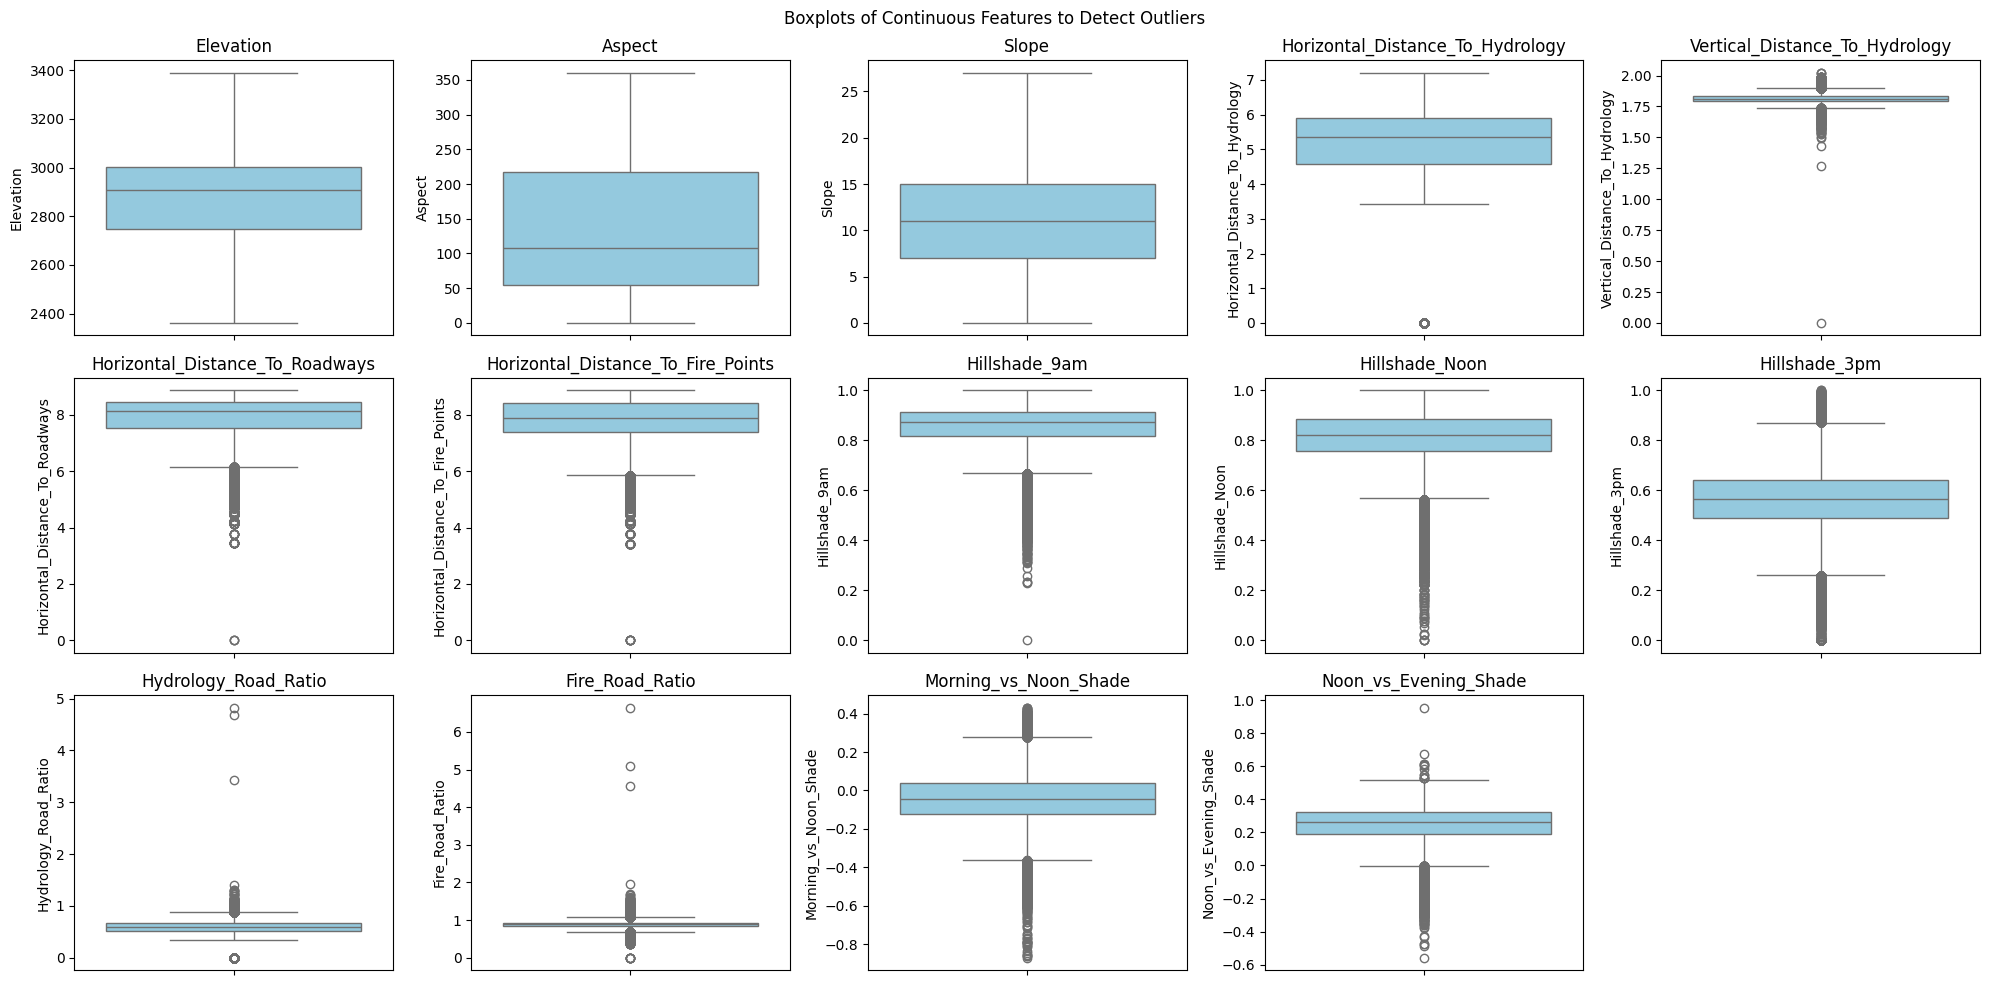

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limit to key continuous features for clarity
boxplot_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Hydrology_Road_Ratio', 'Fire_Road_Ratio',
    'Morning_vs_Noon_Shade', 'Noon_vs_Evening_Shade'
]

plt.figure(figsize=(20, 10))
plt.suptitle("Boxplots of Continuous Features to Detect Outliers")

for i, col in enumerate(boxplot_cols):
    plt.subplot(3, 5, i+1)  # 3 rows, 5 columns layout
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


In [14]:
#These are continuous or discrete numeric values:
numerical_univariate = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Hydrology_Road_Ratio', 'Fire_Road_Ratio',
    'Morning_vs_Noon_Shade', 'Noon_vs_Evening_Shade'
]


In [13]:
##These are binary or multi-class features:
categorical_univariate = [
    'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', ..., 'Soil_Type_40',  # all one-hot encoded soil types
    'Cover_Type'  # your target variable
]


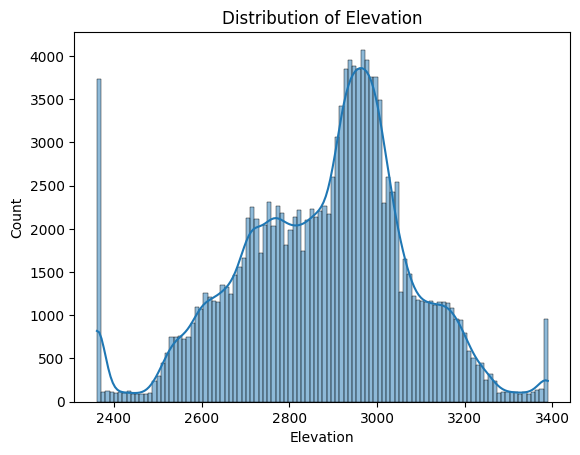

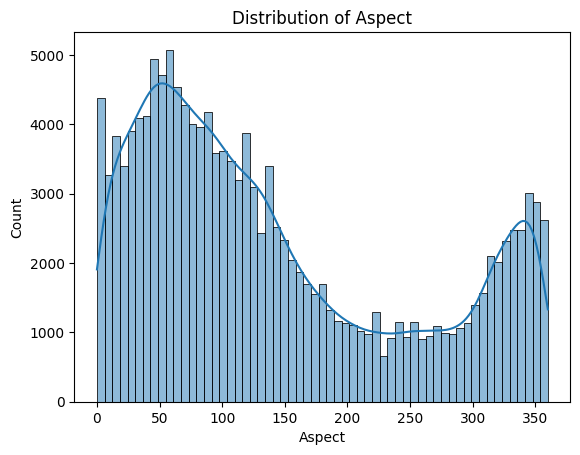

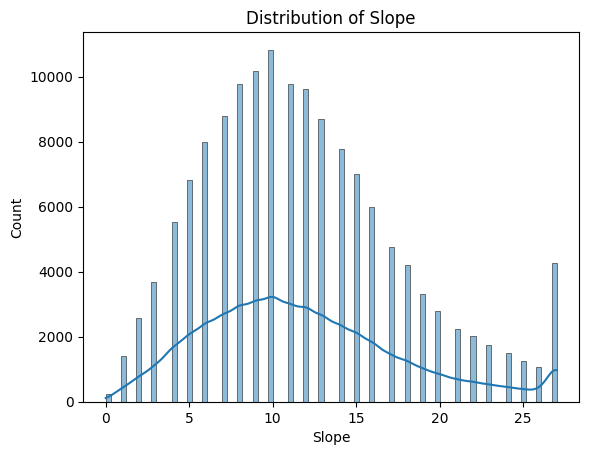

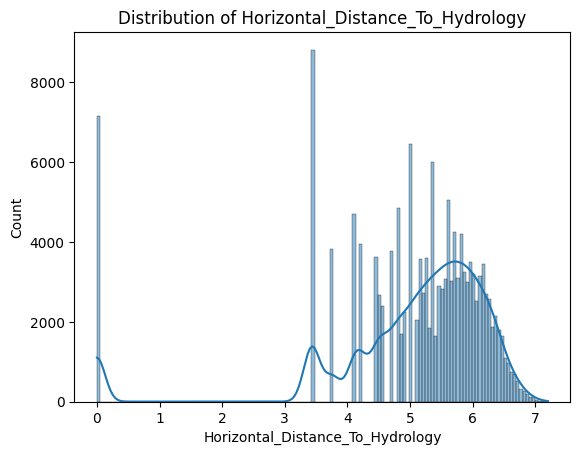

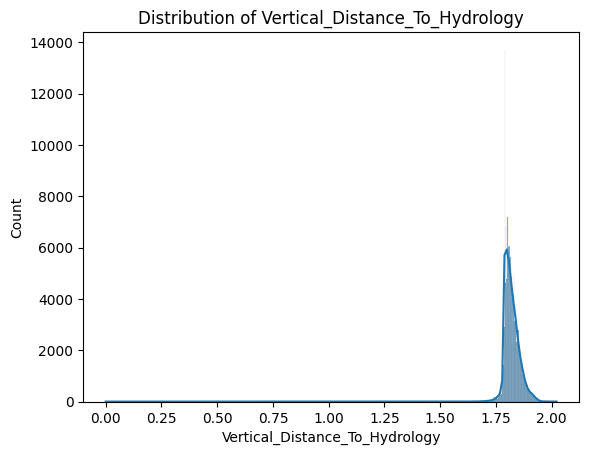

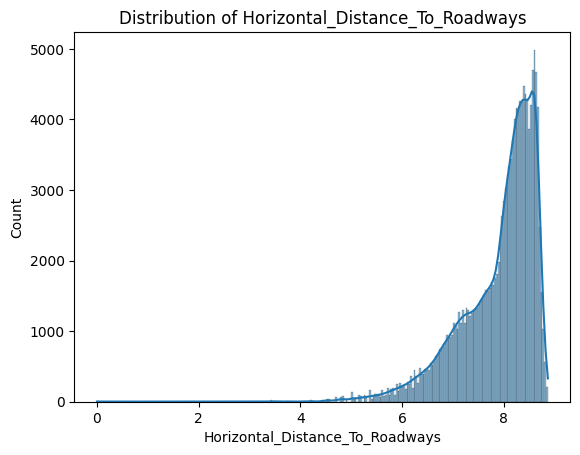

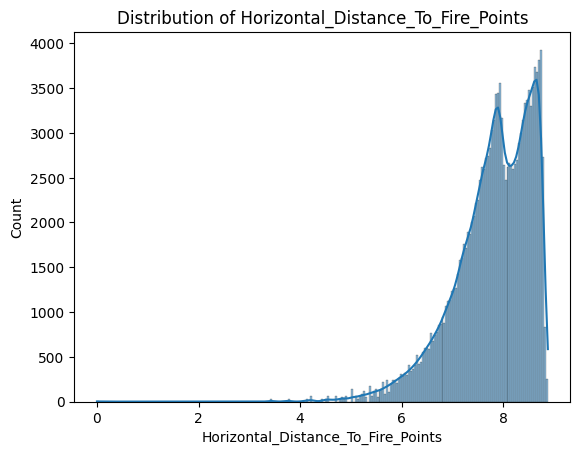

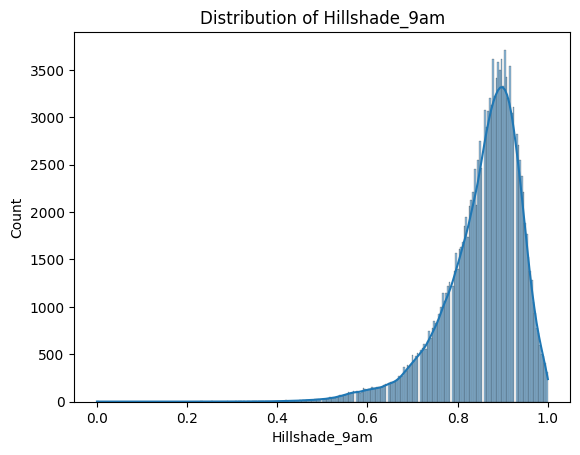

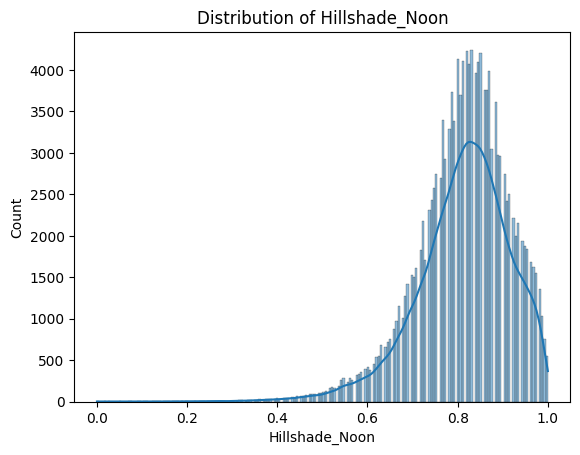

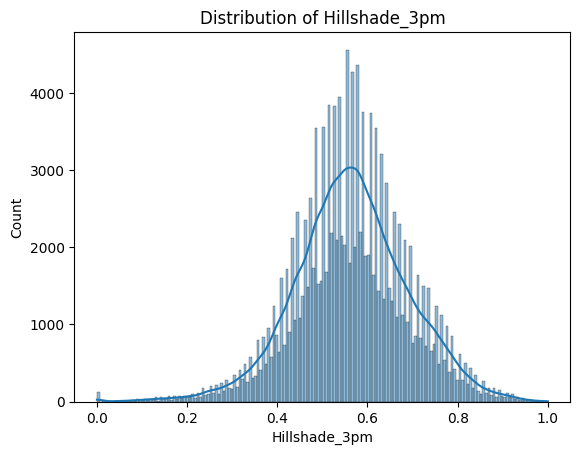

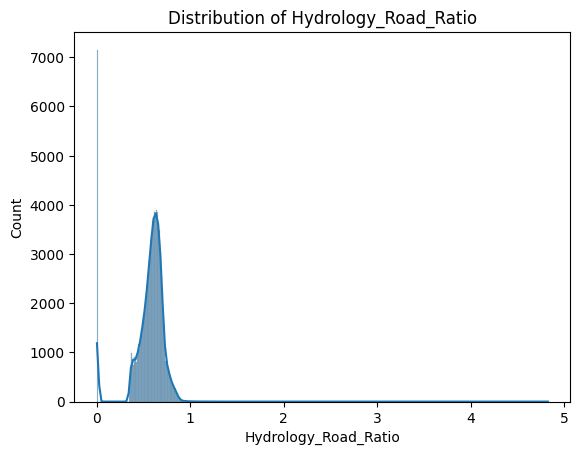

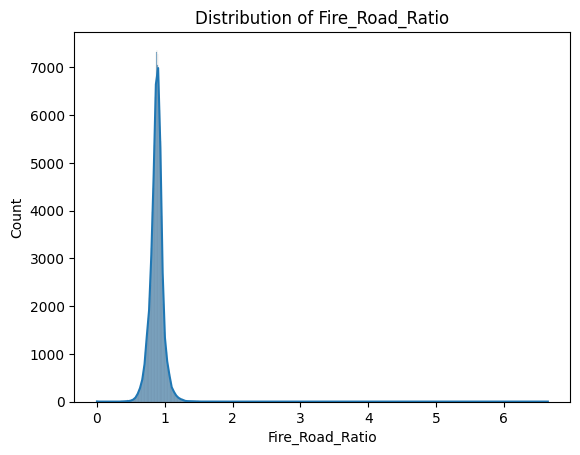

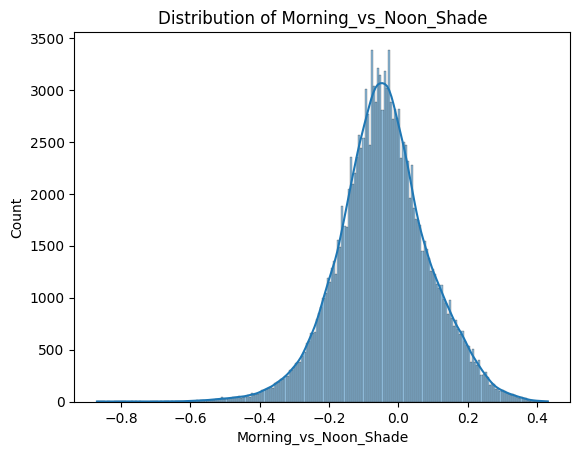

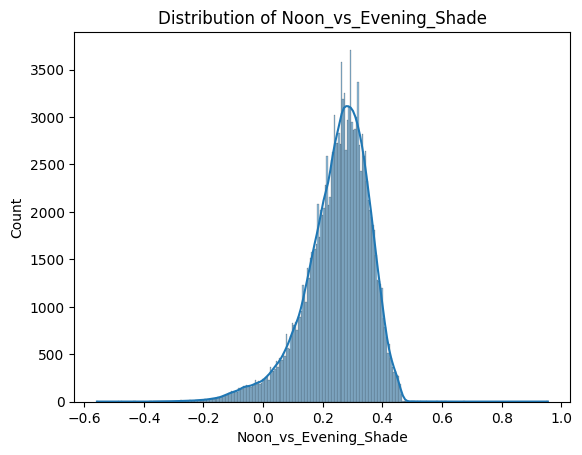

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_univariate:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [17]:
categorical_univariate = [
    'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5',
    'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
    'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16',
    'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
    'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
    'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
    'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
    'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
    'Cover_Type'
]


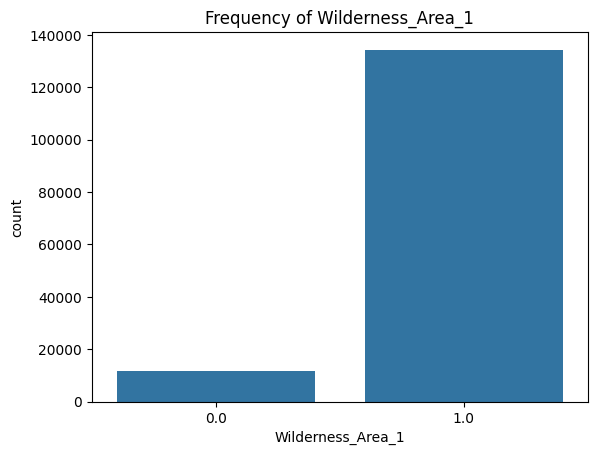

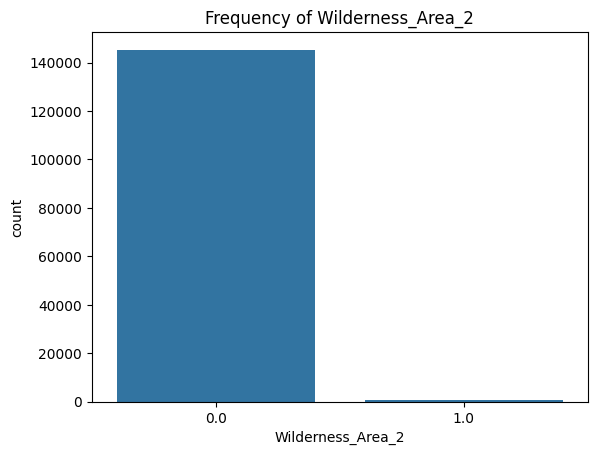

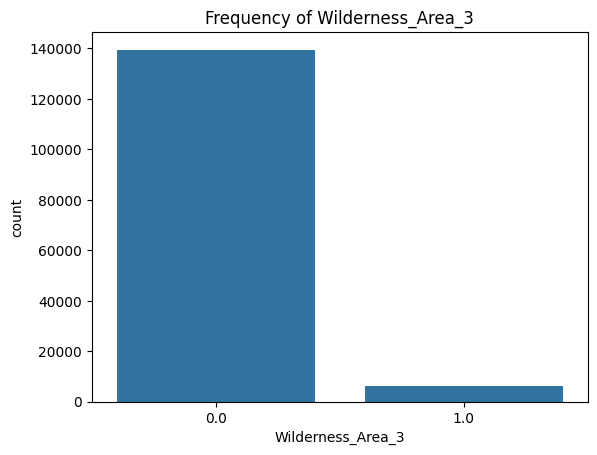

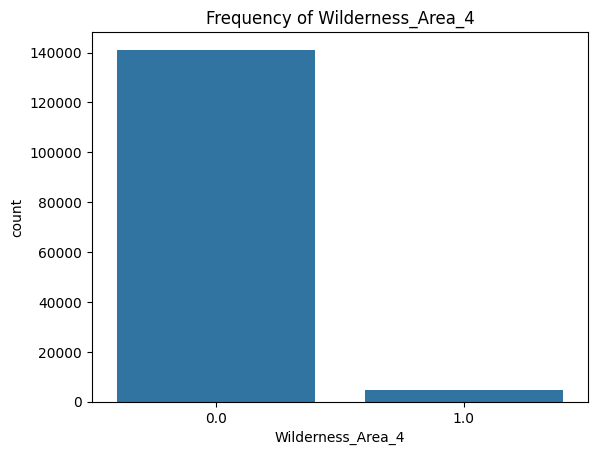

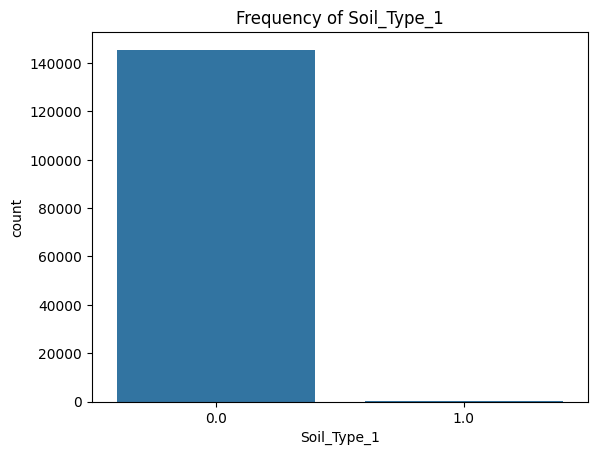

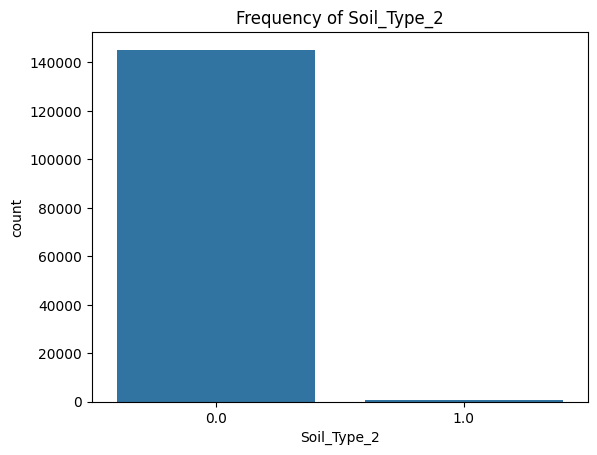

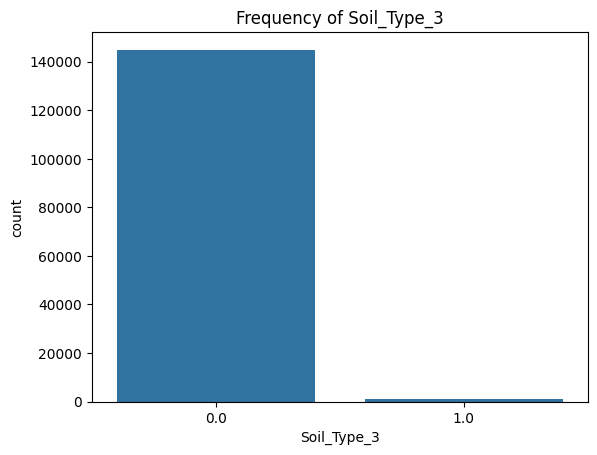

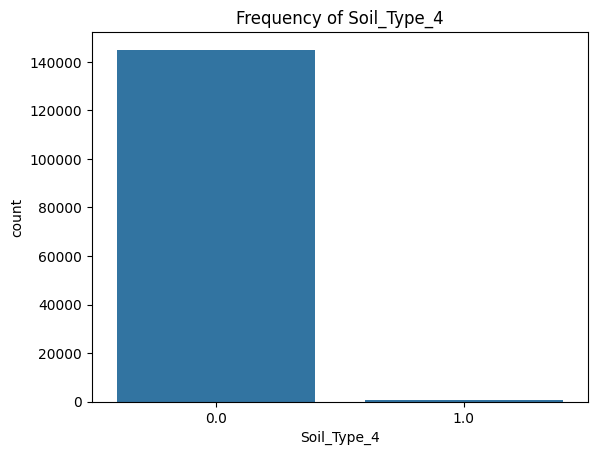

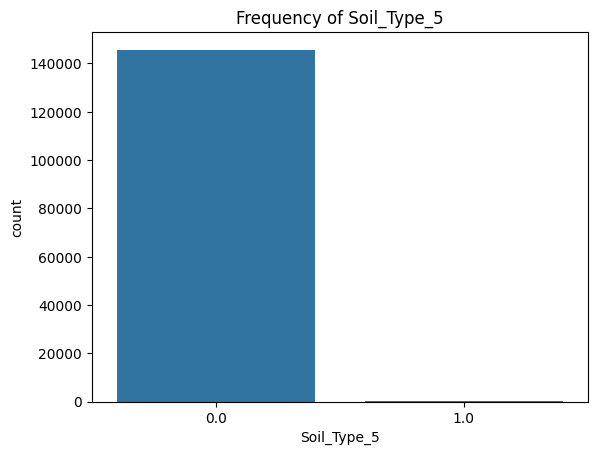

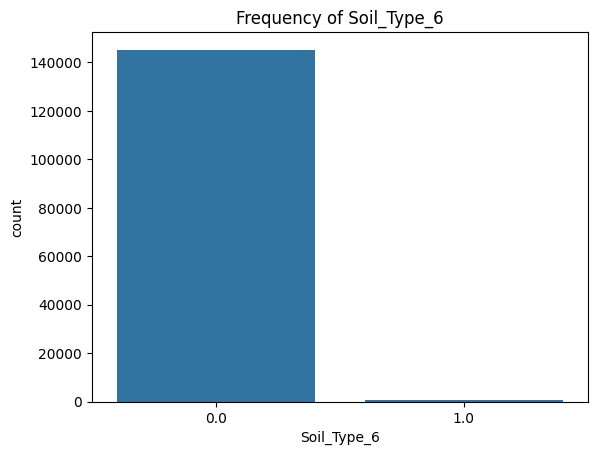

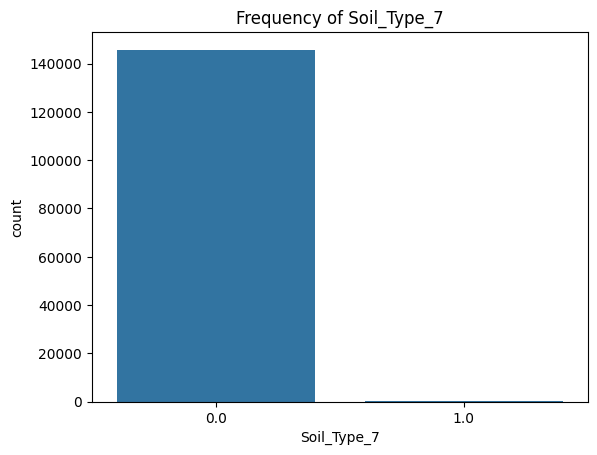

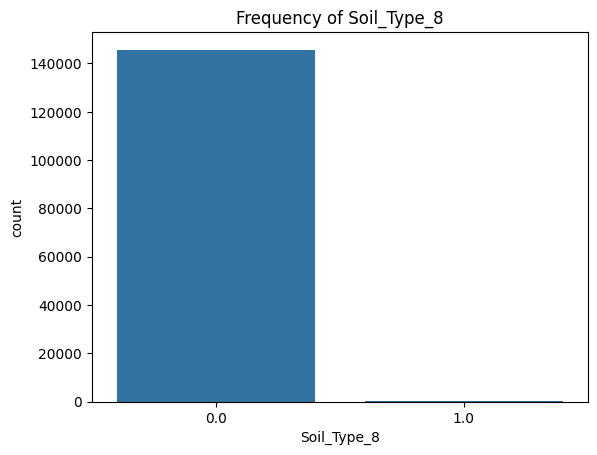

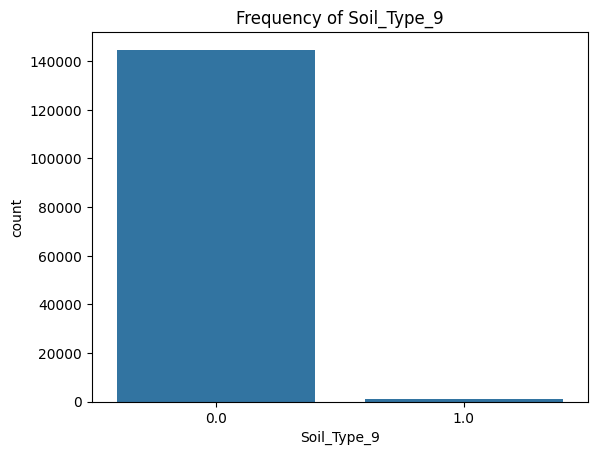

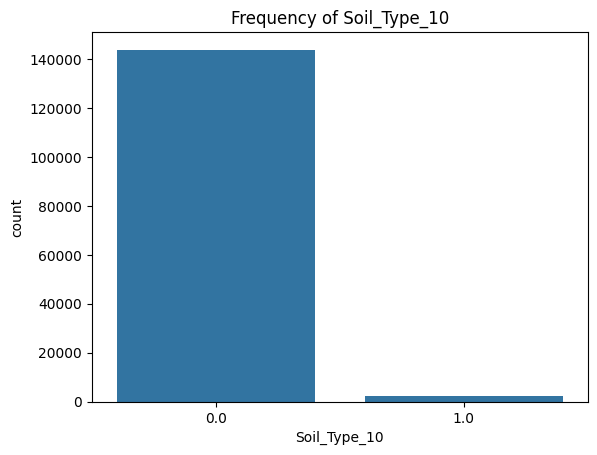

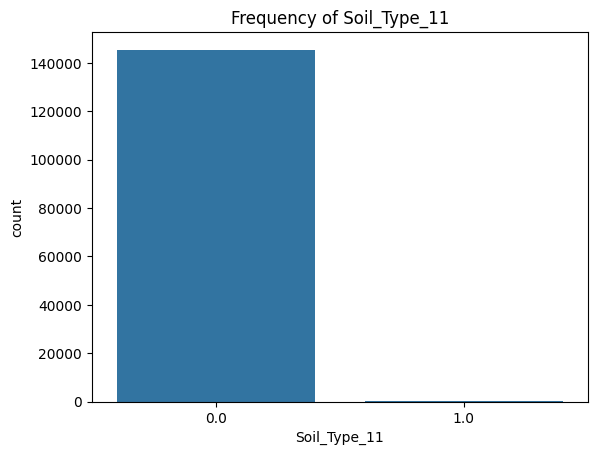

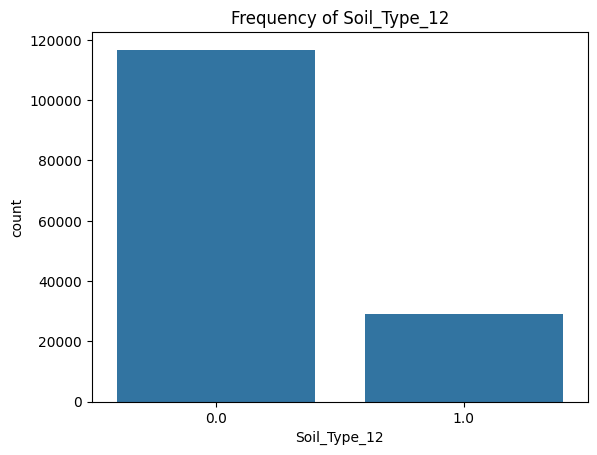

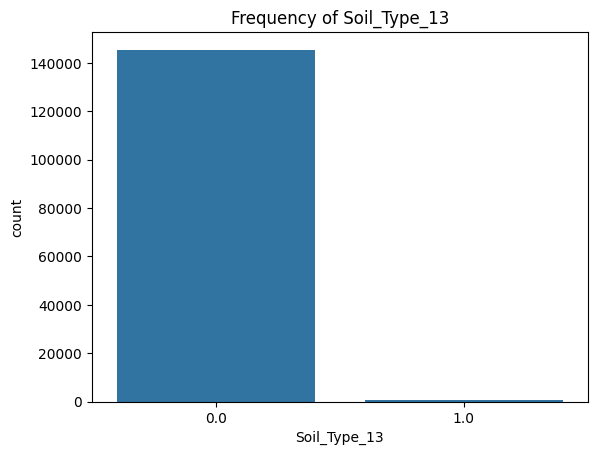

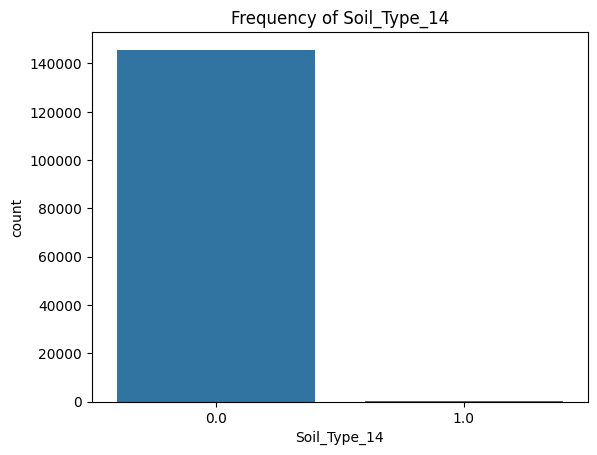

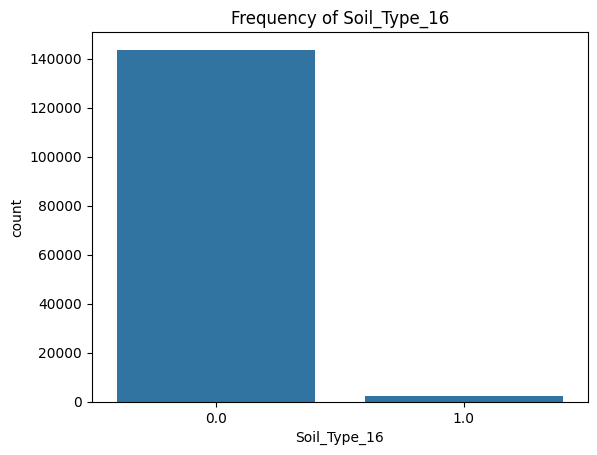

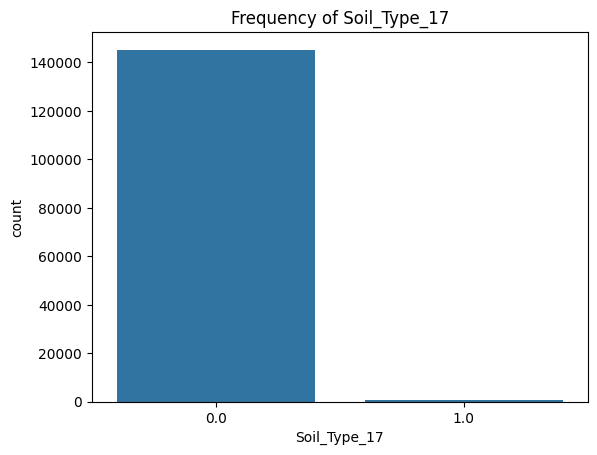

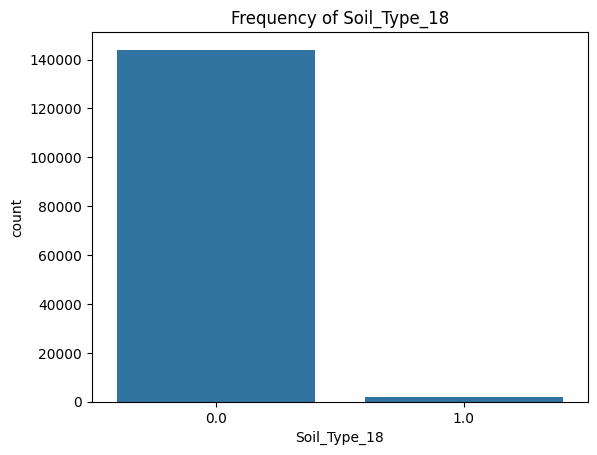

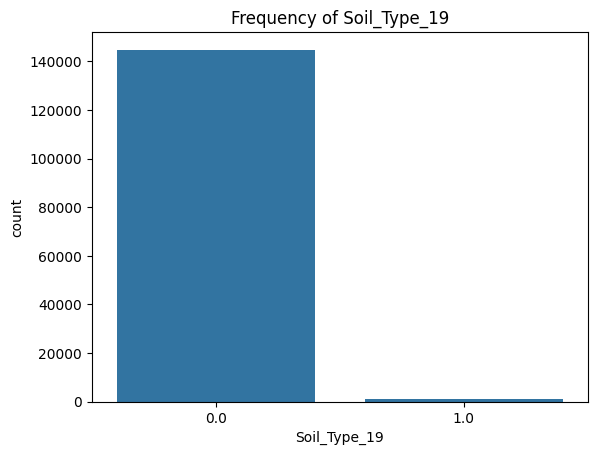

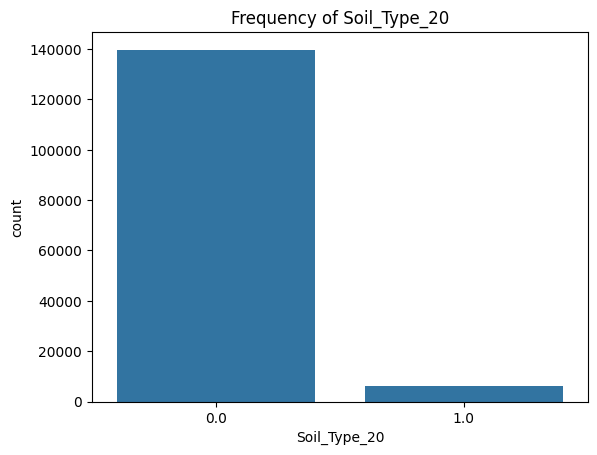

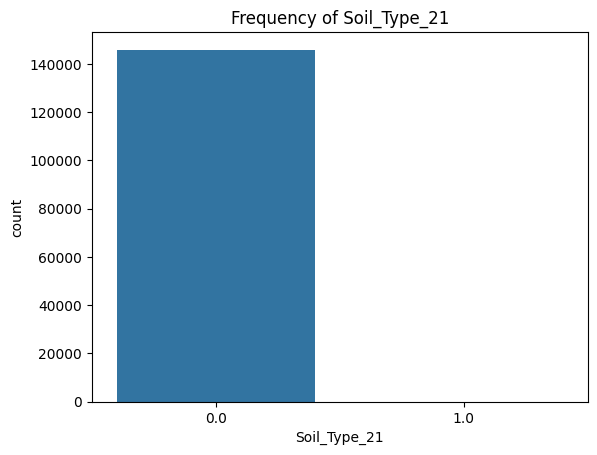

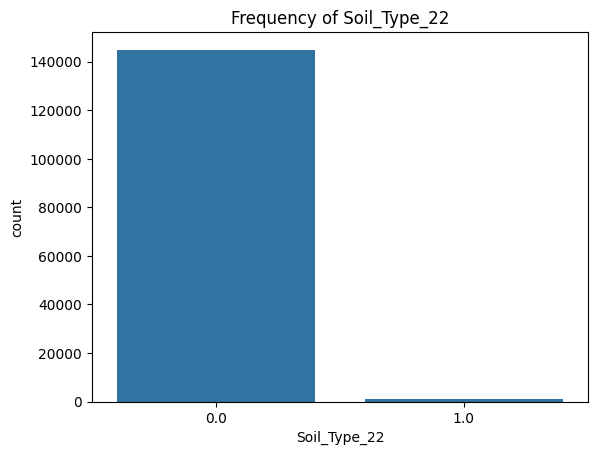

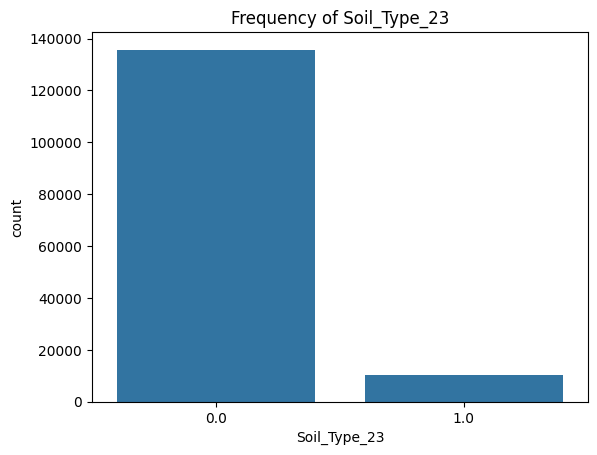

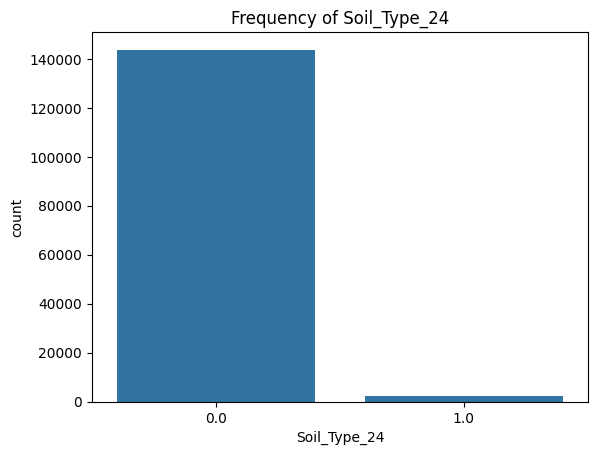

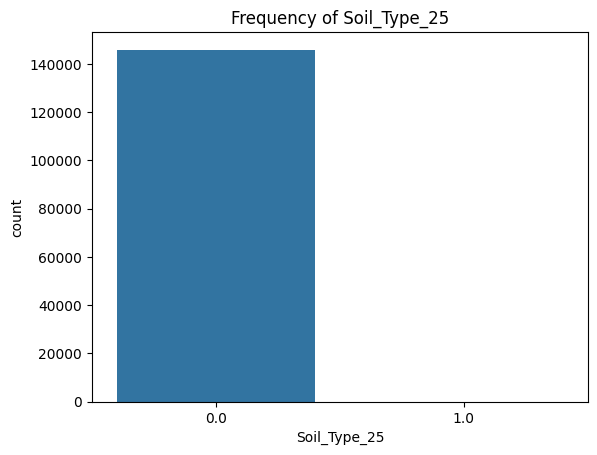

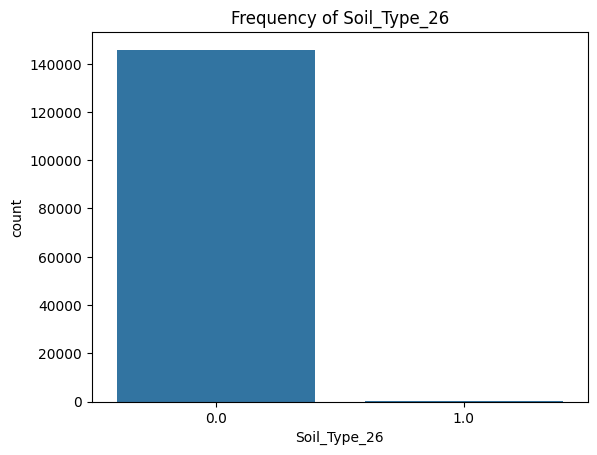

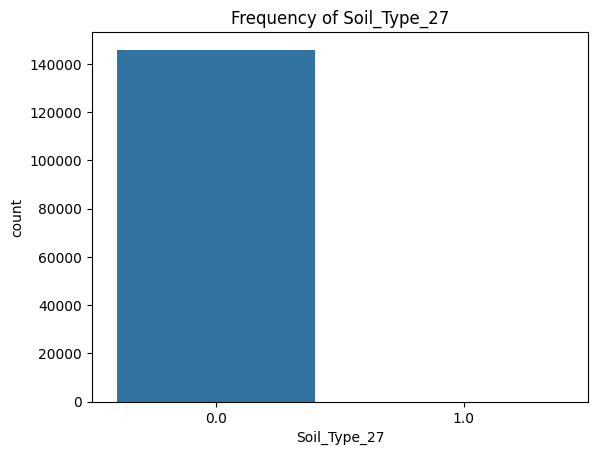

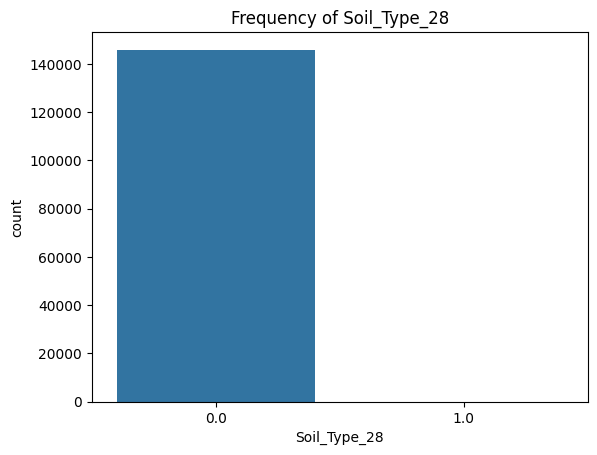

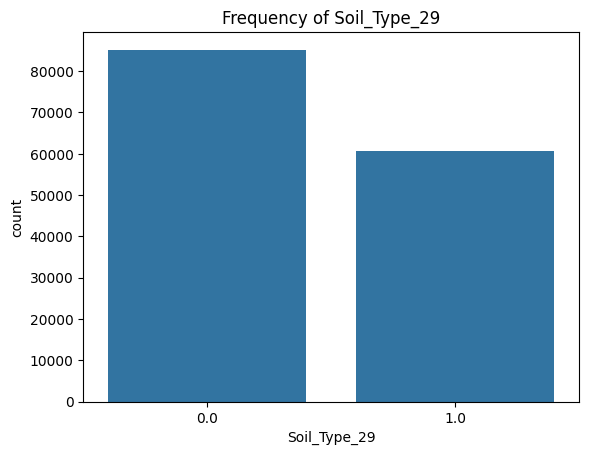

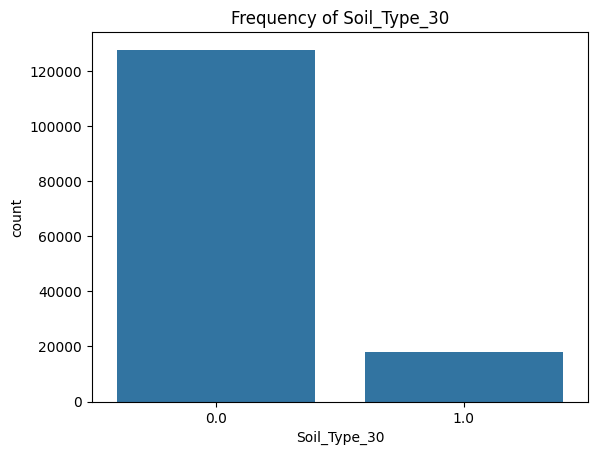

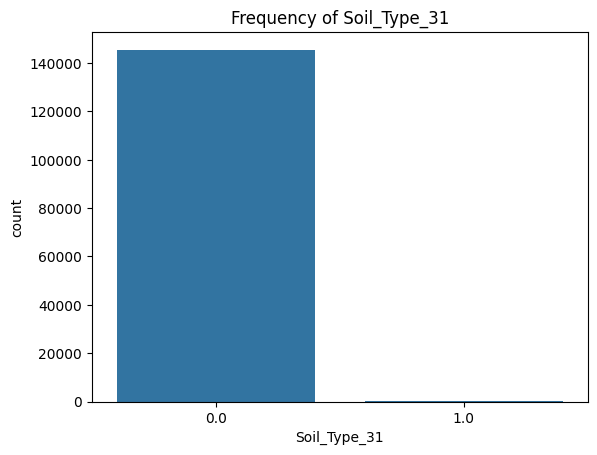

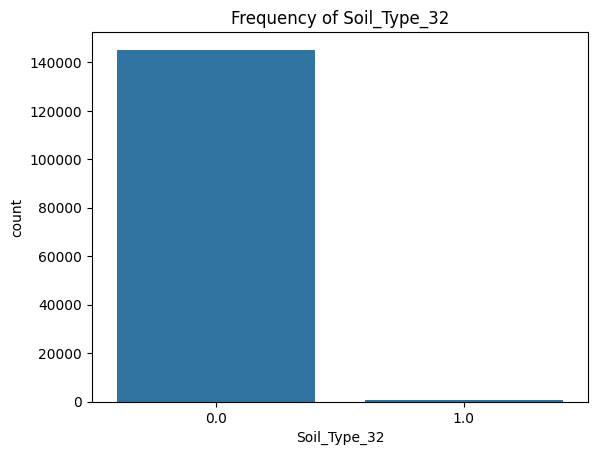

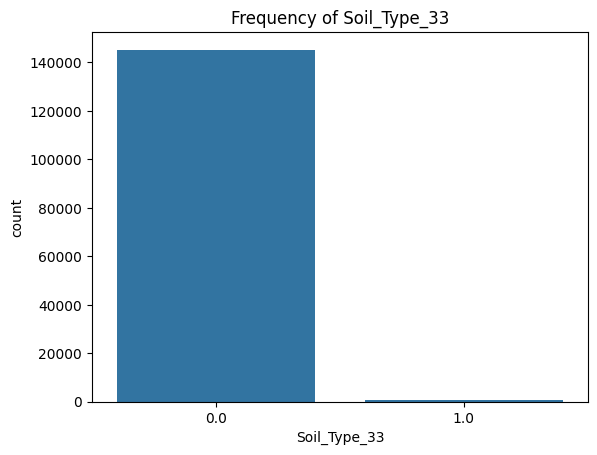

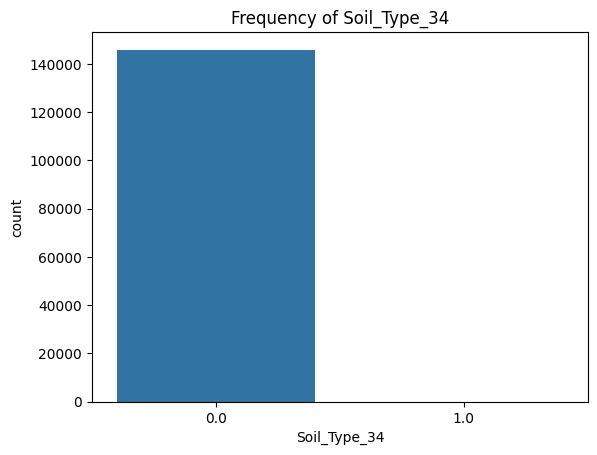

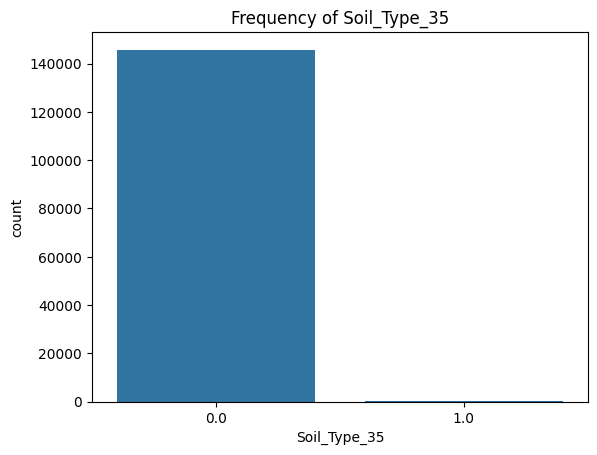

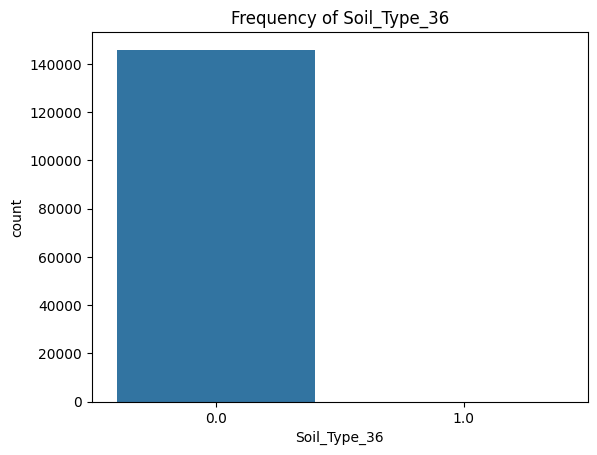

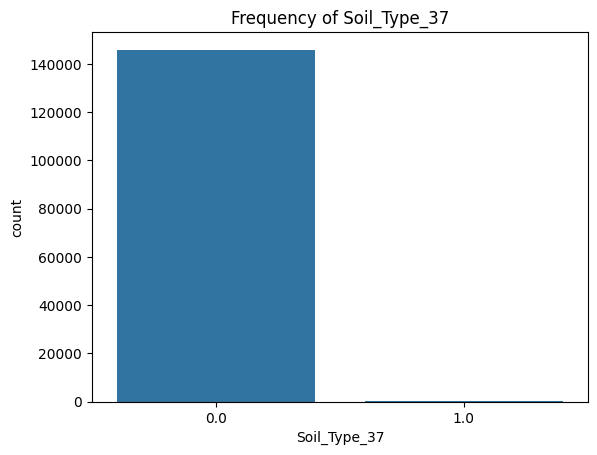

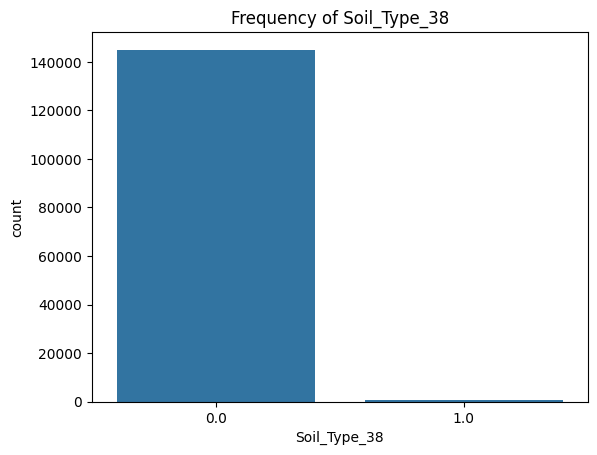

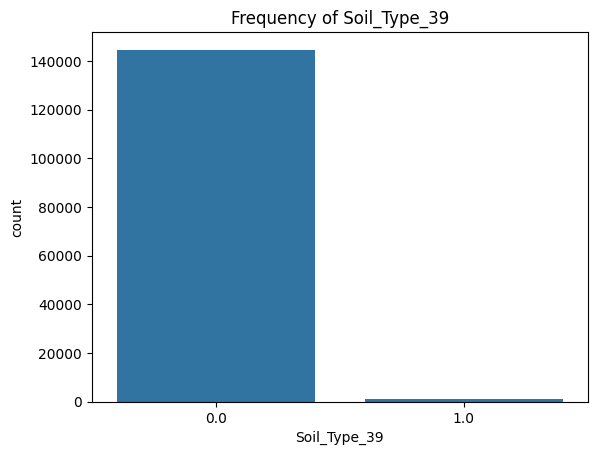

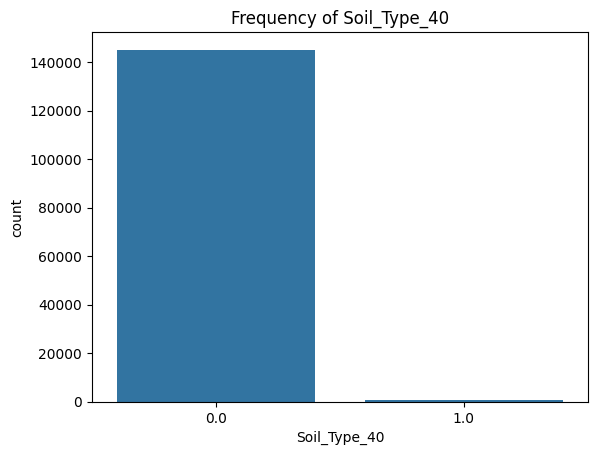

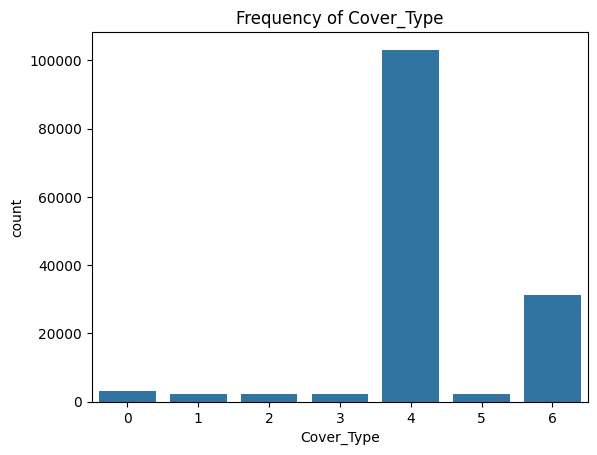

In [18]:
for col in categorical_univariate:
    sns.countplot(x=col, data=df)
    plt.title(f"Frequency of {col}")
    plt.show()


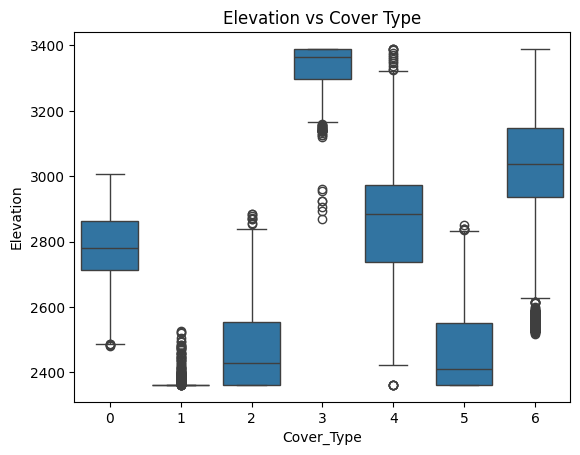

In [19]:
# Explore how elevation varies across forest cover types.
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title("Elevation vs Cover Type")
plt.show()


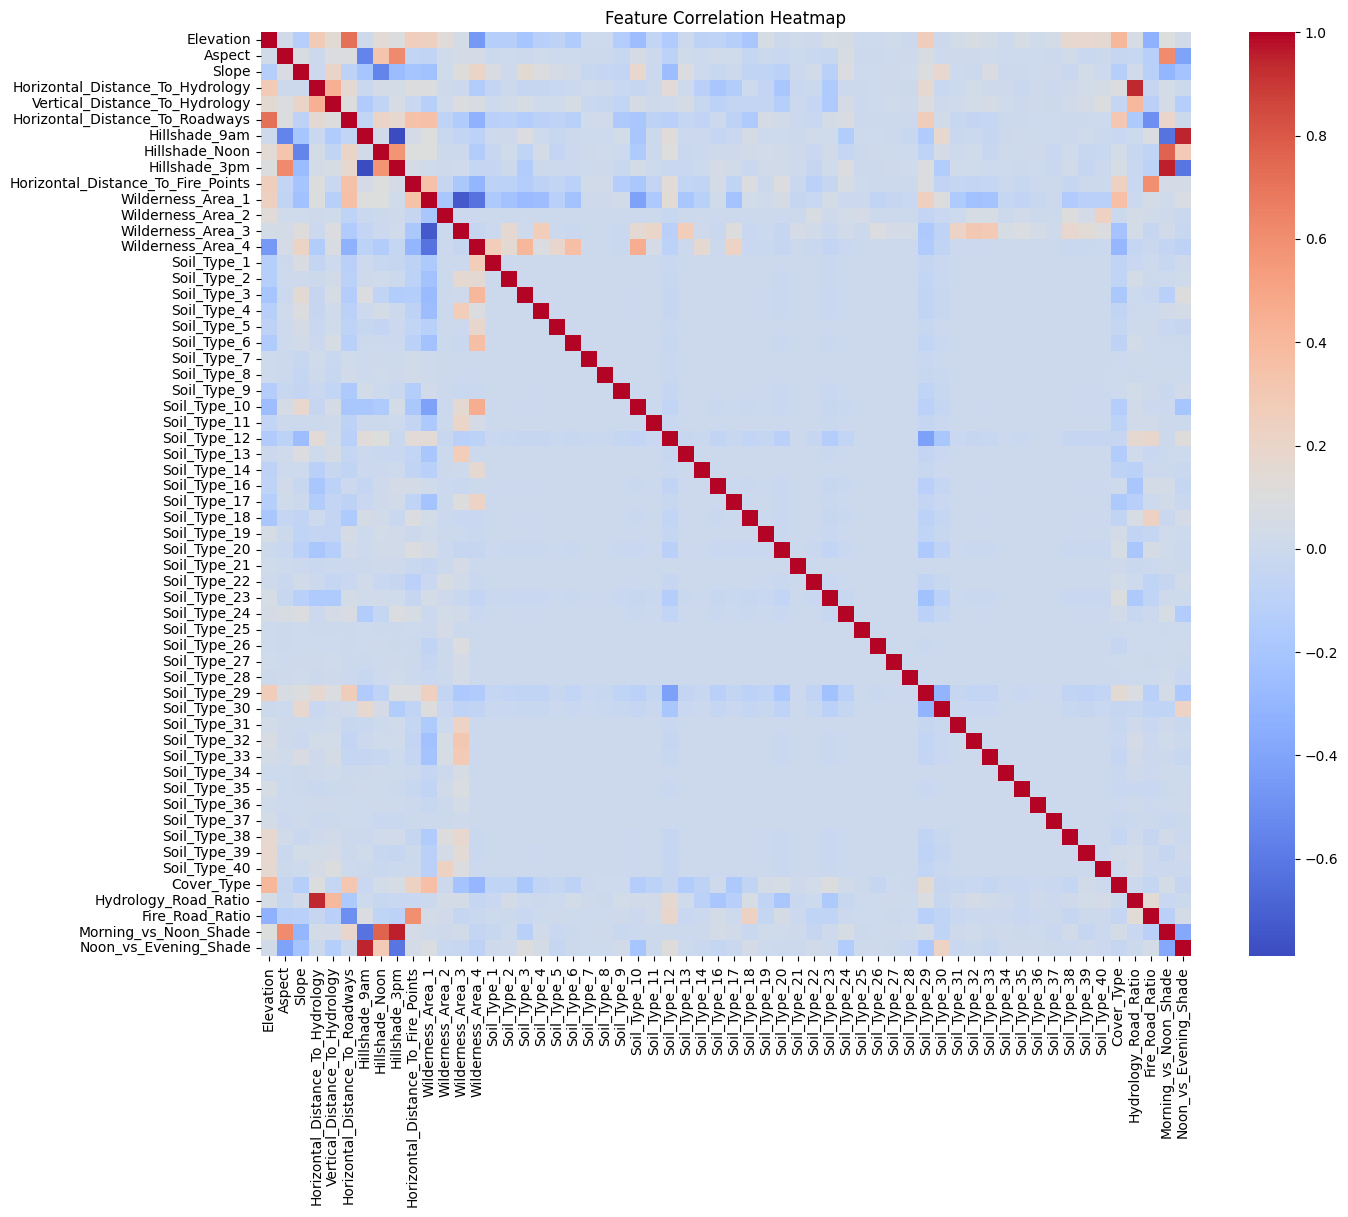

In [20]:
# Heatmap shows pairwise correlations between features.
# Helps detect redundancy or multicollinearity.
corr = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


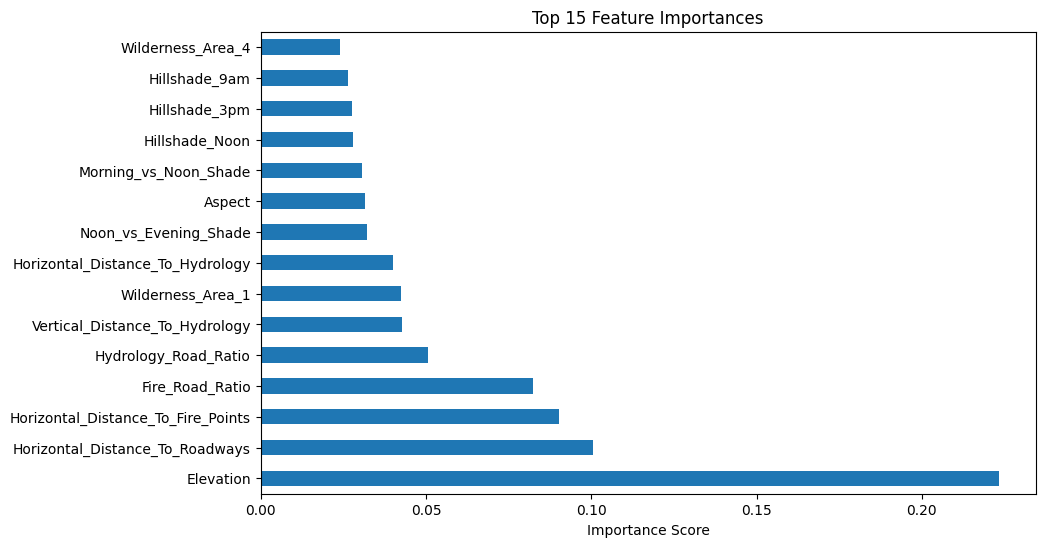

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Step 1: Separate features and target
# We drop 'Cover_Type' from the dataset to create feature matrix X,
# and assign 'Cover_Type' as the target variable y.
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Step 2: Split data into training and testing sets
# This ensures we train the model on one part and reserve the other for validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a baseline Random Forest model
# Random Forest is chosen for its ability to rank feature importance.
# We are not optimizing it—just using it for interpretability.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
# The model assigns an importance score to each feature based on how useful it was in splitting trees.
importances = model.feature_importances_
feature_names = X.columns

# Step 5: Visualize top 15 most important features
# We plot the top 15 features to understand which ones contribute most to predicting forest cover type.
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]
feat_imp.plot(kind='barh', figsize=(10, 6), title="Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


In [24]:
feat_imp

Elevation                             0.223308
Horizontal_Distance_To_Roadways       0.100444
Horizontal_Distance_To_Fire_Points    0.090328
Fire_Road_Ratio                       0.082284
Hydrology_Road_Ratio                  0.050463
Vertical_Distance_To_Hydrology        0.042812
Wilderness_Area_1                     0.042588
Horizontal_Distance_To_Hydrology      0.039932
Noon_vs_Evening_Shade                 0.032085
Aspect                                0.031680
Morning_vs_Noon_Shade                 0.030690
Hillshade_Noon                        0.027792
Hillshade_3pm                         0.027483
Hillshade_9am                         0.026336
Wilderness_Area_4                     0.024134
dtype: float64

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

rf_top_k = pd.Series(model.feature_importances_, index=X.columns).nlargest(10).index.tolist()


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

skb_top_k = X.columns[selector.get_support()].tolist()


In [28]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X, y)

rfe_top_k = X.columns[rfe.support_].tolist()


KeyboardInterrupt: 

In [ ]:
print("Random Forest Top 10:", rf_top_k)
print("SelectKBest Top 10:", skb_top_k)
print("RFE Top 10:", rfe_top_k)

# Find common features across all methods
common_features = set(rf_top_k) & set(skb_top_k) & set(rfe_top_k)
print("Common Features Across All Methods:", list(common_features))


In [32]:
top_15_features = feat_imp.index.tolist()
print(top_15_features)


['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Fire_Road_Ratio', 'Hydrology_Road_Ratio', 'Vertical_Distance_To_Hydrology', 'Wilderness_Area_1', 'Horizontal_Distance_To_Hydrology', 'Noon_vs_Evening_Shade', 'Aspect', 'Morning_vs_Noon_Shade', 'Hillshade_Noon', 'Hillshade_3pm', 'Hillshade_9am', 'Wilderness_Area_4']


In [33]:
top_15_features

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Fire_Road_Ratio',
 'Hydrology_Road_Ratio',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area_1',
 'Horizontal_Distance_To_Hydrology',
 'Noon_vs_Evening_Shade',
 'Aspect',
 'Morning_vs_Noon_Shade',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Wilderness_Area_4']

In [34]:
X_selected = df[top_15_features]
y = df['Cover_Type']


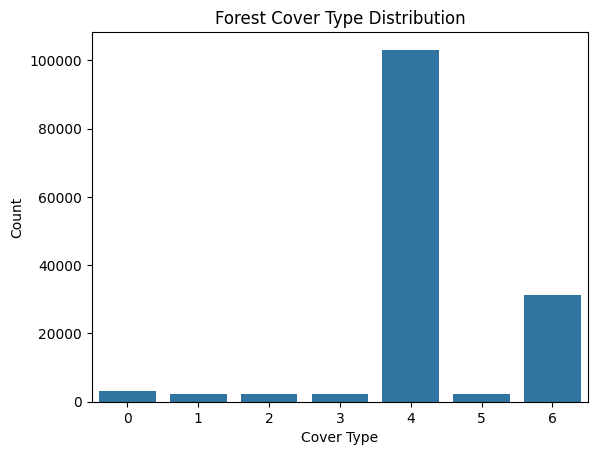

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='Cover_Type', data=df)
plt.title("Forest Cover Type Distribution")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()


In [36]:
from collections import Counter

# Print class counts
class_counts = Counter(df['Cover_Type'])
print("Class distribution:\n", class_counts)


Class distribution:
 Counter({4: 103071, 6: 31110, 0: 3069, 3: 2160, 5: 2160, 2: 2160, 1: 2160})


In [ ]:
###########Class Imbalance Handling

In [37]:
! pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
   --------- ----------------------------- 61.4/240.0 kB 544.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/240.0 kB 544.7 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/240.0 kB 554.9 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/240.0 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 240.0/240.0 kB 733.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# Import SMOTE for synthetic oversampling of minority classes
from imblearn.over_sampling import SMOTE

# Import train-test split utility
from sklearn.model_selection import train_test_split

# Step 1: Select top 15 most important features from your dataset
# These features were identified earlier using Random Forest feature importance
X = df[top_15_features]  # Feature matrix
y = df['Cover_Type']     # Target variable (multi-class forest cover type)


In [39]:
# Step 2: Split the dataset into training and testing sets
# This ensures that SMOTE is applied only to training data to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [40]:
# Step 3: Initialize SMOTE
# SMOTE creates synthetic samples for minority classes in the training set
smote = SMOTE(random_state=42)

# Step 4: Apply SMOTE to training data only
# This balances the class distribution by generating new samples for underrepresented classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [41]:
# Step 5: Print class distribution before and after SMOTE
# This confirms that SMOTE has successfully balanced the training data
from collections import Counter

print("Original:", Counter(y_train))         # Class counts before SMOTE
print("Resampled:", Counter(y_train_resampled))  # Class counts after SMOTE


Original: Counter({4: 82362, 6: 24891, 0: 2489, 5: 1758, 3: 1755, 1: 1737, 2: 1720})
Resampled: Counter({4: 82362, 6: 82362, 1: 82362, 5: 82362, 2: 82362, 0: 82362, 3: 82362})


In [42]:
# Save resampled training set
X_train_resampled.to_csv('../data/X_train_resampled.csv', index=False)
y_train_resampled.to_csv('../data/y_train_resampled.csv', index=False)

# Save original test set
X_test.to_csv('../data/X_test.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)
